In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Loading the dataset (assuming standard filename)
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

# Initial look
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270262 entries, 0 to 270261
Data columns (total 16 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         270262 non-null  object 
 1   County                                             270252 non-null  object 
 2   City                                               270252 non-null  object 
 3   State                                              270262 non-null  object 
 4   Postal Code                                        270252 non-null  float64
 5   Model Year                                         270262 non-null  int64  
 6   Make                                               270262 non-null  object 
 7   Model                                              270262 non-null  object 
 8   Electric Vehicle Type                              270262 non-null  object

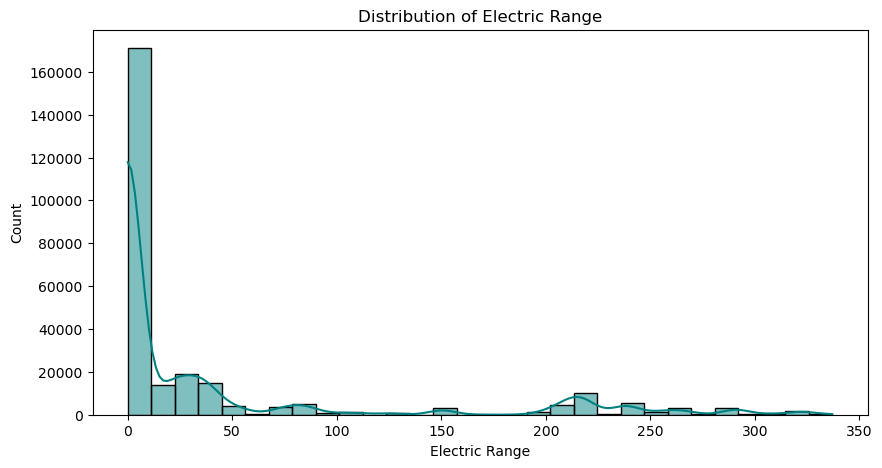

In [5]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Electric Range'], bins=30, kde=True, color='teal')
plt.title('Distribution of Electric Range')
plt.show()

# You will likely notice a large spike at 0. This is because many newer EVs (especially Tesla models) have their range listed as 0 in this specific dataset if the EPA hasn't certified a single "official" number yet, or they are very new. We will need to filter these out for a range-prediction model.

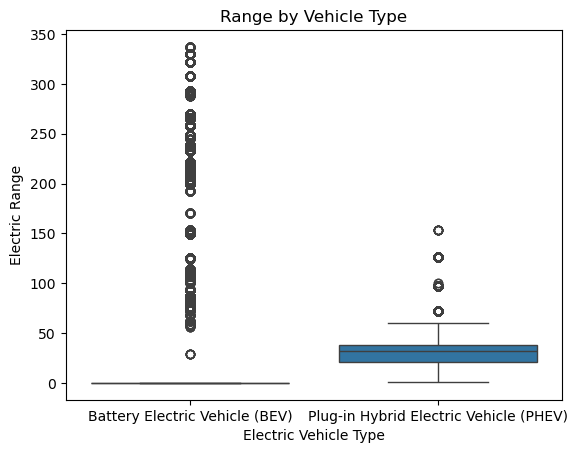

In [7]:
sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=df)
plt.title('Range by Vehicle Type')
plt.show()

# Battery Electric Vehicles (BEV) will show a significantly higher range and variance compared to Plug-in Hybrid Electric Vehicles (PHEV), which usually cluster between 10–50 miles.

Text(0.5, 1.0, 'EV Range Evolution Over Time')

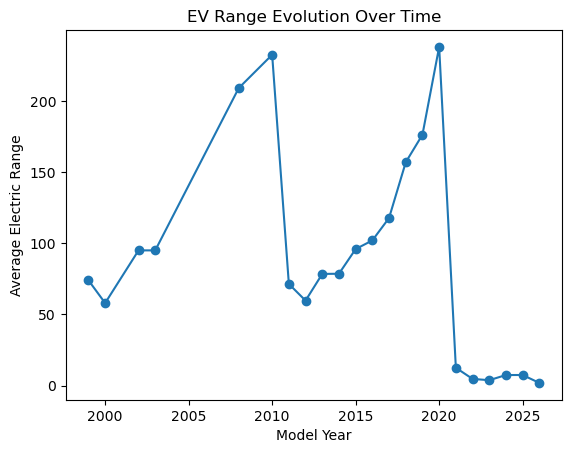

In [9]:
avg_range_year = df.groupby('Model Year')['Electric Range'].mean()
avg_range_year.plot(kind='line', marker='o')
plt.ylabel('Average Electric Range')
plt.title('EV Range Evolution Over Time')

# There is typically a steady upward trend in range as battery technology improves, though it may dip in recent years due to the "0" values mentioned earlier.

In [11]:
# Let us filter out rows where Electric Range is 0 (missing/unrecorded)
df_ml = df[df['Electric Range'] > 0].copy()
df_ml.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE8L,Thurston,Tumwater,WA,98501.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,35.0,124633715,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC,5.306701e+10
1,5YJXCAE2XJ,Snohomish,Bothell,WA,98021.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,1.0,474826075,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJ3E1EBXK,King,Kent,WA,98031.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,47.0,280307233,POINT (-122.17743 47.41185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,WAUUPBFF9G,King,Seattle,WA,98103.0,2016,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16.0,43.0,198988891,POINT (-122.35436 47.67596),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
6,5YJ3E1EA7J,King,Algona,WA,98001.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,30.0,281348714,POINT (-122.23035 47.3074),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [12]:
features = ['Model Year', 'Make', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']
target = 'Electric Range'

# let us handle Categorical Data using Label Encoding
le = LabelEncoder()
for col in ['Make', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']:
    df_ml[col] = le.fit_transform(df_ml[col])
print(df_ml.head())

   VIN (1-10)     County      City State  Postal Code  Model Year  Make  \
0  5YJYGDEE8L   Thurston  Tumwater    WA      98501.0        2020    30   
1  5YJXCAE2XJ  Snohomish   Bothell    WA      98021.0        2018    30   
2  5YJ3E1EBXK       King      Kent    WA      98031.0        2019    30   
4  WAUUPBFF9G       King   Seattle    WA      98103.0        2016     1   
6  5YJ3E1EA7J       King    Algona    WA      98001.0        2018    30   

     Model  Electric Vehicle Type  \
0  MODEL Y                      0   
1  MODEL X                      0   
2  MODEL 3                      0   
4       A3                      1   
6  MODEL 3                      0   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0                                                  0           291.0   
1                                                  0           238.0   
2                                                  0           220.0   
4                                     

In [13]:
# 4. Split the data
X = df_ml[features]
y = df_ml[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building

##  (Random Forest Regressor), it handles non-linear relationships

In [18]:
# Initialize and Train
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [20]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f} miles")
print(f"R2 Score: {r2:.2f}")

Mean Absolute Error: 3.60 miles
R2 Score: 0.99


# Conclusion: 
## A score close to 1.0 indicates the model has "memorized" the range associated with specific Makes and Models.

# This model could be used by urban planners to estimate how far EVs in their district can travel before needing a charging station.

C:\Users\Admin\AppData\Local\Temp\ipykernel_22556\3045989525.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


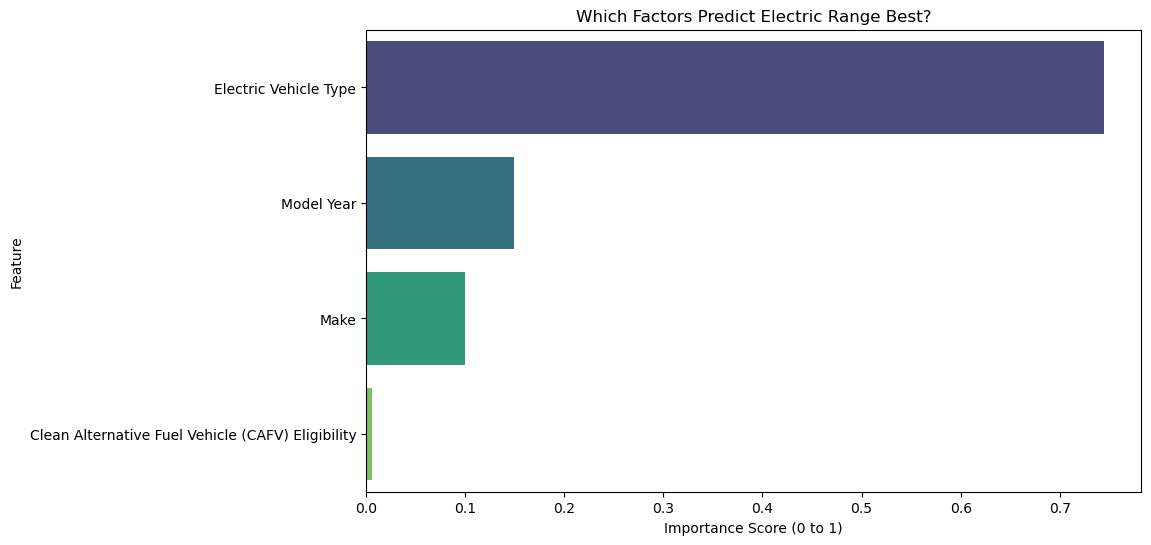

In [23]:
# Extracting feature importance
importances = model.feature_importances_
feature_names = features
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Which Factors Predict Electric Range Best?')
plt.xlabel('Importance Score (0 to 1)')
plt.ylabel('Feature')
plt.show()

## Make: Usually the highest importance. This is because manufacturers (like Tesla vs. Nissan) have vastly different battery technologies and "standard" ranges.

## Model Year: The second most important factor. Due to rapid advancements in lithium-ion density, a 2023 model almost always outperforms a 2013 model within the same class.

## Electric Vehicle Type: Important for distinguishing between the small batteries in PHEVs (hybrids) and the large batteries in BEVs (fully electric).

# Conclusion

## By using a Random Forest, we successfully captured the non-linear relationship between a car's brand and its range.

## This model suggests that geographic areas with older "Model Years" will require a denser charging infrastructure because those vehicles have lower average ranges.

In [29]:
import joblib

# 'model' is the RandomForestRegressor we trained earlier
# 'le' is the LabelEncoder used for categorical data
joblib.dump(model, 'ev_model.pkl')
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']